In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('display.max_columns', None) 

In [ ]:
df = pd.read_csv('../data/Rodent_Inspection.csv')
df

In [ ]:
df = df[df['INSPECTION_DATE'].notna()]

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
date = []

for i in range(len(df['INSPECTION_DATE'])):
    date.append(df['INSPECTION_DATE'][i][0:10])

df['date'] = date

In [ ]:
year = []

for i in range(len(df['date'])):
    year.append(df['date'][i][6:10])

df['year'] = year

In [ ]:
df['year'] = pd.to_numeric(df['year'])

In [ ]:
df = df[df['year'] >= 2018]

In [ ]:
lst = ['INSPECTION_TYPE', 'JOB_PROGRESS', 'ZIP_CODE', 'LATITUDE', 'LONGITUDE', 'BOROUGH', 'date', 'year' ]
df = df[lst]
df

In [ ]:
lst2 = ['INSPECTION_TYPE','JOB_PROGRESS','ZIP_CODE','BOROUGH']
df[lst2] = df[lst2].astype(object)

In [ ]:
df.info()

In [ ]:
df.to_csv('..\output\processed_data2.csv')

In [11]:
df = pd.read_csv('../output/processed_data2.csv')
df = df.drop(columns=['Unnamed: 0'])
df.head(3)

,INSPECTION_TYPE,JOB_PROGRESS,ZIP_CODE,LATITUDE,LONGITUDE,BOROUGH,date,year
0,Initial,1.0,11205.0,NaN,NaN,Brooklyn,06/09/2022,2022
1,BAIT,5.0,11226.0,40.650001,-73.964154,Brooklyn,06/08/2022,2022
2,Initial,1.0,10454.0,40.807937,-73.912159,Bronx,08/08/2022,2022


In [12]:
df_pre = df[df['year'] <= 2019]
df_post = df[df['year'] > 2019]

In [13]:
len(df_pre)

329784

In [14]:
df_tmp = df_pre.groupby(['BOROUGH'])['INSPECTION_TYPE'].count().reset_index()
df_tmp['Percentage'] = round(df_tmp['INSPECTION_TYPE']/len(df_pre)*100,2)
df_tmp

,BOROUGH,INSPECTION_TYPE,Percentage
0,Bronx,85123,25.81
1,Brooklyn,113777,34.50
2,Manhattan,107112,32.48
3,Queens,18249,5.53
4,Staten Island,5523,1.67


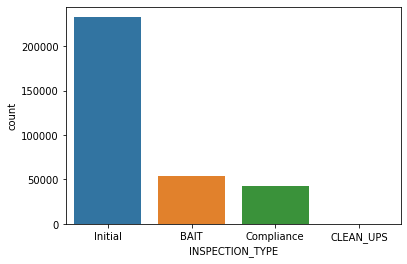

In [16]:
sns.countplot(x = 'INSPECTION_TYPE', data = df_pre);

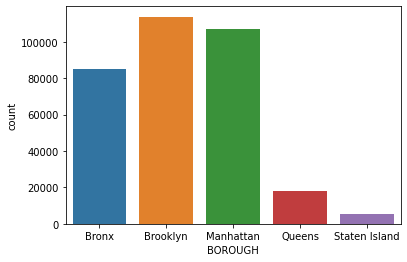

In [20]:
sns.countplot(x = 'BOROUGH', data = df_pre, order=["Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"]);

In [15]:
df_tmp2 = df_post.groupby(['BOROUGH'])['INSPECTION_TYPE'].count().reset_index()
df_tmp2['Percentage'] = round(df_tmp2['INSPECTION_TYPE']/len(df_post)*100,2)
df_tmp2

,BOROUGH,INSPECTION_TYPE,Percentage
0,Bronx,61701,24.61
1,Brooklyn,88124,35.14
2,Manhattan,80078,31.93
3,Queens,16517,6.59
4,Staten Island,4184,1.67


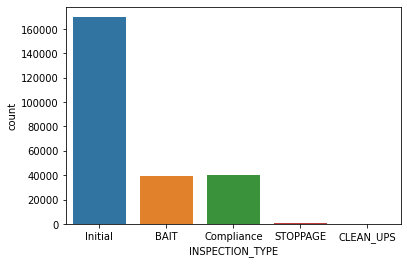

In [18]:
sns.countplot(x = 'INSPECTION_TYPE', data = df_post);

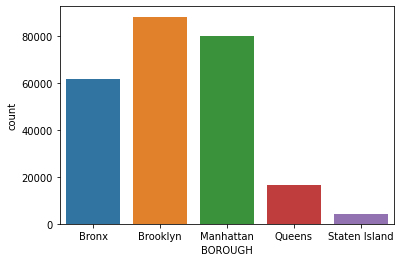

In [21]:
sns.countplot(x = 'BOROUGH', data = df_post, order=["Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"]);